# Aproximación, Convergencia, Estabilidad.

**Objetivo general.**
- Entender que es un algoritmo e implementar un ejemplo.
- Entender los conceptos de aproximación, convergencia y estabilidad.

## Introducción.

Cuando usamos una computadora para simular problemas de la vida real, lo primero que debemos tomar en cuenta es que necesitamos construir **algoritmos** que generen soluciones numéricas, las cuales deberán **aproximar** a la solución real del problema que estamos estudiando. Un algoritmo debe **converger** a la solución real y debe ser **estable**. 

Para entender estos conceptos, veamos un ejemplo.

## Ejemplo.

Nos piden calcular la siguiente integral:

$$
y_n = \int_{0}^{1} \frac{x^n}{x+5} dx
$$

para $n = 0, 1, 2, 3, \dots$

Seguramente, durante tus primeros semestres has batallado con las derivadas de funciones, pero ¡aún más con las integrales!

Es importante que tengas frescos los métodos y técnicas para derivar e integrar; por ahora, para este ejemplo, usaremos la biblioteca Sympy para hacer un análisis del problema que se ha planteado.


<div class="alert alert-info" role="alert">
En las celdas que siguen, trata de entender el código que se está implementando. Durante la clase el profesor explicará con más detalle que es lo que está sucediendo. Si tienes dudas, por favor pregunta a tu profesor durante la clase, seguramente no eres el único(a) que tiene preguntas.
</div>

### Integral exacta.

In [1]:
import sympy
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import macti.visual as mvis

In [3]:
# Modifica el valor de n = 0, 1, 2, 3 y 4, ejectua la celda y observa el resultado
n = 0

# Función original 
x = sympy.symbols('x')
f = x**n / (x+5)
print("Función original:")
display(f)

# Integral de la función original
g = sympy.integrate(f, x)
print("Integral de la función original:")
display(g)

Función original:


1/(x + 5)

Integral de la función original:


log(x + 5)

La siguiente función calcula el valor de la integral en el intervalo $[0,1]$ y grafica la función $f(x) = \frac{x^n}{x+5}$ para $n=0,1,2,3,4$

n = 0, Valor de la integral = 0.182321556793955
n = 1, Valor de la integral = 0.0883922160302273
n = 2, Valor de la integral = 0.0580389198488689
n = 3, Valor de la integral = 0.0431387340890126
n = 4, Valor de la integral = 0.0343063295549655


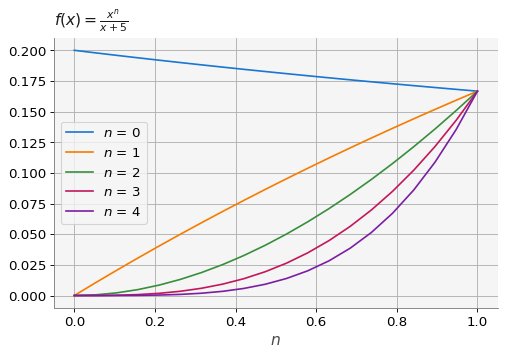

In [4]:
def integral_exacta(N, iexacta):
    vis = mvis.Plotter(1,1, [dict(title=r'$f(x) = \frac{x^n}{x+5}$', 
                                 xlabel='$n$')])
    x = sympy.symbols('x')

    for n in range(N):
        f = x**n / (x+5)
        g = sympy.integrate(f, (x, 0.0, 1.0))

        fn = sympy.lambdify(x, f)
        t = np.linspace(0.0,1,20)
        vis.plot(1, t, fn(t), label = '$n$ = {}'.format(n))
        
        iexacta.append(g)
        print("n = {}, Valor de la integral = {}".format(n, g))

    vis.legend()
    vis.grid()
    vis.show()
    
# Arreglo donde se almacena el valor numérico de la integral
iexacta = []

# Ejecutamos la función para n = 0,1,2,3,4
integral_exacta(5, iexacta)  

<div class="alert alert-success">
<b>Observaciones.</b><br>
1. La curva de la función original siempre está por arriba del cero, independientemente del valor de $n$.<br>
2. La integral de una función representa el área bajo la curva de la misma.<br>
3. De acuerdo con los puntos 1 y 2, el valor de la integral de $f(x)$ debe ser siempre positivo. <br>
4. El área bajo la curva va disminuyendo conforme $n \to 0$. Esto se verifica observando el valor de la integral para cada $n$.<br>
5. El cálculo exacto se almacenó en el arreglo <b>iexacta</b> para usarlo en comparaciones posteriores. 
</div>

### Aproximación de la integral.

En este curso aprenderás a construir algoritmos numéricos para aproximar soluciones exactas. Así que vamos a implementar el siguiente algoritmo para aproximar la integral que ya se calculó previamente:

---
**Algoritmo 1**.

Calcular la integral usando la siguiente relación de recurrencia:

$$
y_n + 5 y_{n-1} =  \frac{1}{n} \tag{1}
$$

Cuando $n=0$ y redondeando a tres cifras obtenemos:

$$
y_0 = \int_{0}^{1} \frac{1}{x+5} dx = \big[\ln(x+5)\big]_0^1 = \ln 6 - \ln 5 \approx 0.182
$$

$y_0$ es nuestra condición inicial para la relación $(1)$.

---

<div class="alert alert-success" role="alert">
Observa que la ecuación $(1)$ se puede escribir como sigue:

$$
y_n  =  \frac{1}{n} - 5 y_{n-1} \tag{2}
$$
</div>

In [5]:
# Implementación del algoritmo

# r es el número de cifras significativas
r = 3

# y0 es la condición inicial
y0 = round(np.log(6) - np.log(5), r)

# Función que implementa el algoritmo 1 (ecuación (2)).
def algoritmo_1(y, n, r):
    return round(1.0 / n - 5 * y[n-1], r)

# Creamos una lista para almacenar la solución, cuyo primer elemento es la condición inicial.
y = [y0]
print("n = {}, Valor de la integral = {}".format(0, y0))

# N es el número de iteraciones
N = 5

# Cálculamos las integrales de 1 a N-1 y guardamos el resultado en la lista.
for n in range(1, N):
    y.append(algoritmo_1(y, n, r))
    print("n = {}, Valor de la integral = {}".format(n, y[-1]))

n = 0, Valor de la integral = 0.182
n = 1, Valor de la integral = 0.09
n = 2, Valor de la integral = 0.05
n = 3, Valor de la integral = 0.083
n = 4, Valor de la integral = -0.165


### Error absoluto.
Para comparar este resultado aproximado con el valor exacto, definimos el error absoluto como sigue:

$$
Error_a = |v_e - v_n|
$$

donde $v_e$ representa a la solución exacta y $v_n$ a la solución numérica. La siguiente función implementa el cálculo de este error.

In [6]:
def calc_error(sol_exa, sol_num):
    error = []
    for e, n in zip(sol_exa, sol_num):
        error.append(np.abs(e - n))
    return error

In [7]:
# Usamos un DataFrame para mostrar los resultados
datos = pd.DataFrame(np.array([iexacta, y, calc_error(iexacta, y)]).T, columns = ['Exacta','Numérica','Error'])
datos

,Exacta,Numérica,Error
0,0.182321556793955,0.182,0.000321556793954680
1,0.0883922160302273,0.09,0.00160778396977271
2,0.0580389198488689,0.05,0.00803891984886888
3,0.0431387340890126,0.083,0.0398612659109874
4,0.0343063295549655,-0.165,0.199306329554965


En la celda siguiente se dibujan las gráficas de la solución exacta, la solución numérica y el error.

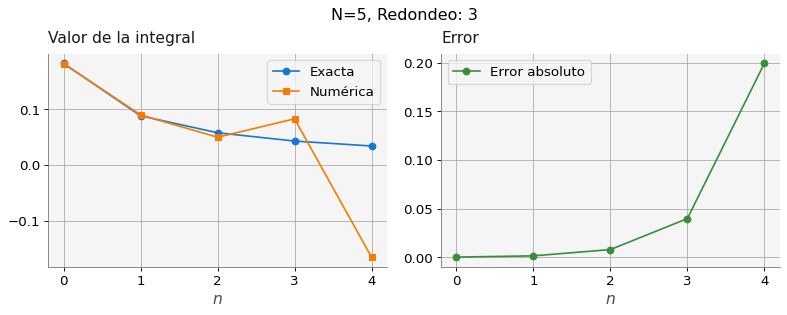

In [8]:
vis = mvis.Plotter(1,2,[dict(title = "Valor de la integral", xlabel='$n$'), 
                        dict(title="Error", xlabel='$n$')],
                  dict(figsize=(10,4)))
xn = [i for i in range(N)]
vis.plot(1, xn, iexacta, marker='o', label='Exacta')
vis.plot(1, xn, y, marker='s', label='Numérica')
vis.plot(2, xn, datos.Error, marker='o', color='C2',label='Error absoluto')

vis.figtitle('N={}, Redondeo: {}'.format(N,r))
vis.grid()
vis.legend()

plt.xticks([i for i in range(N)])
plt.show()

**¿Qué conclusiones puedes obtener de los resultados que se han obtenido?**<br>
**¿Cómo podrías mejorar el resultado numérico?**

Lo que acabas de experimentar en este ejercicio es cómo un **algoritmo** puede **aproximar** la solución de un problema; esta aproximación puede o no **converger** a la solución exacta dependiendo del valor de diferentes parámetros. De igual manera, se puede observar que el algoritmo numérico puede ser **inestable**, pues después de unos pasos la solución numérica comienza a oscilar. A continuación te damos unas definiciones más formales:

<div class="alert alert-success">

<ul>
<li>Un <b>algoritmo</b> consiste de un conjunto finito de instrucciones o reglas bien definidas, ordenadas y que no son ambiguas, que siguiéndolas correctamente permiten solucionar problemas, realizar cálculos, procesar datos o llevar acabo diferentes tipos de tareas.</li>
    
<li>
<b>Aproximación.</b> 
El grado de aproximación de un modelo numérico al modelo matemático original, se caracteriza por el error que se introduce con respecto de la solución exacta.
</li>

<li>
<b>Estabilidad.</b>
Caracteriza la manera de propagación de los errores iniciales durante el proceso de cálculo de los algoritmos. Si el error va disminuyendo conforme el algoritmo se va ejecutando, entonces tenemos estabilidad. Por otro lado, si el error es muy grande, oscila y/o se incrementa sin ningún control, entonces el método/algoritmo es inestable. La estabilidad es una característica que define la calidad de cada método o algoritmo.
</li>
    
<li>
<b>Convergencia.</b>
Significa que la solución numérica se va acercando cada vez más a la solución exacta conforme el algoritmo numérico avanza y algunos parámetros se van ajustando.
</li>

</ul>

</div>